## Research Proposal

#### Problem - Define, Justify, Review:

(1) Define: Often times articles may not receive the maximum number of ‘recommends’ possible.

(2)	Justify: If the articles do not receive the maximum amount of ‘recommends’, they are less likely to be recommended and read by the maximum number of readers. The organization (Medium) receives less traffic and loses the accompanying business benefits when content delivery is not optimized.

(3)	Review: Currently, minimal guidance is publicly given to writers in regard to the optimal article structure required for maximizing 'recommends'.

#### Hypothesis:

(1)	Writing articles that are 2000 words or less will increase the average number of ‘recommends’ or unique users that ‘clap’ for an article.

#### Rollout plan:

A. Conduct t-test on existing Medium article dataset by splitting it into two segments: 

(1)	Articles with 2000 words or less

(2)	Articles with over 2000 words

(3)	Compare mean number of recommends between the two datasets

(4)	Make sure the two subgroups of the total collection of articles are similar in composition for the other numerical attributes (average number of tags, paid to unpaid ratio, follower count, followed count, responses count)

B. Use t-test info to determine if the two groups have a statistically significant difference in number of recommends

(1)	Number of standard deviations from mean above 1.96 (or 2) since sample size is over 100

C. Standard for evaluation of significance: p-value less than 0.05.

### NULL HYP: 

#### The length of Medium Articles does not impact the number of recommends (There is no statistically significant difference in the number of recommends between articles with 2000 words or less and those with over 2000 words).

### Parameters:

#### Metric: 
Mean Recommends. 

Supplemental Metric: Average Number of Recommends per unit of Standard Deviation

#### Duration: 
Articles first published between 2010-2018, samples collected over the period between Sept 2017 and Sept 2018.

#### Sample Size: 
65000 articles

#### Sample Composition: 
The data contains all posts tagged AI, Machine Learning, Datascience or Aritificial Intelligence on Medium during the sample period.


### Dataset: https://www.kaggle.com/aiswaryaramachandran/medium-articles-with-content

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
%matplotlib inline

In [2]:
medium = pd.read_csv('mediumdata.csv')

In [3]:
medium.columns

Index(['audioVersionDurationSec', 'codeBlock', 'codeBlockCount',
       'collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
       'firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'language', 'latestPublishedDate', 'latestPublishedDatetime',
       'linksCount', 'postId', 'readingTime', 'recommends',
       'responsesCreatedCount', 'socialRecommendsCount', 'subTitle',
       'tagsCount', 'text', 'title', 'totalClapCount', 'uniqueSlug',
       'updatedDate', 'updatedDatetime', 'url', 'vote', 'wordCount',
       'publicationdescription', 'publicationdomain',
       'publicationfacebookPageName', 'publicationfollowerCount',
       'publicationname', 'publicationpublicEmail', 'publicationslug',
       'publicationtags', 'publicationtwitterUsername', 'tag_name', 'slug',
       'name', 'postCount', 'author', 'bio', 'userId', 'userName',
       'usersFollowedByCount', 'usersFollowedCount', 'scrappedDate'],
      dtype='object')

In [4]:
cleanmedium = medium.drop(['audioVersionDurationSec', 'codeBlockCount', 'scrappedDate', 'codeBlock', \
                           'createdDate', 'createdDatetime', 'text', 'uniqueSlug', \
                           'vote', 'publicationdescription', 'publicationdomain','publicationfacebookPageName', \
                           'publicationpublicEmail', 'publicationslug','publicationtags', 'publicationtwitterUsername',\
                           'slug', 'author', 'bio', 'userId', 'publicationfollowerCount',\
                           'socialRecommendsCount', 'firstPublishedDate',  'latestPublishedDate', 'updatedDate', \
                           'subTitle', 'name', 'tag_name', 'postCount', 'collectionId', 'updatedDatetime'], axis=1)

In [5]:
cleanmedium.columns

Index(['firstPublishedDatetime', 'imageCount', 'isSubscriptionLocked',
       'language', 'latestPublishedDatetime', 'linksCount', 'postId',
       'readingTime', 'recommends', 'responsesCreatedCount', 'tagsCount',
       'title', 'totalClapCount', 'url', 'wordCount', 'publicationname',
       'userName', 'usersFollowedByCount', 'usersFollowedCount'],
      dtype='object')

In [6]:
cleanmedium.head(3)

,firstPublishedDatetime,imageCount,isSubscriptionLocked,language,latestPublishedDatetime,linksCount,postId,readingTime,recommends,responsesCreatedCount,tagsCount,title,totalClapCount,url,wordCount,publicationname,userName,usersFollowedByCount,usersFollowedCount
0,2018-09-18 20:57:03,1,False,en,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
1,2018-09-18 20:57:03,1,False,en,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
2,2018-09-18 20:57:03,1,False,en,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0


In [7]:
cleanmedium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279577 entries, 0 to 279576
Data columns (total 19 columns):
firstPublishedDatetime     279577 non-null object
imageCount                 279577 non-null int64
isSubscriptionLocked       279577 non-null bool
language                   279577 non-null object
latestPublishedDatetime    279577 non-null object
linksCount                 279577 non-null int64
postId                     279577 non-null object
readingTime                279577 non-null float64
recommends                 279577 non-null int64
responsesCreatedCount      279577 non-null int64
tagsCount                  279577 non-null int64
title                      279572 non-null object
totalClapCount             279577 non-null int64
url                        279577 non-null object
wordCount                  279577 non-null int64
publicationname            137231 non-null object
userName                   279577 non-null object
usersFollowedByCount       279577 non-null floa

In [8]:
cleanmedium.set_index('postId', drop=True, inplace=True)
cleanmedium = cleanmedium.loc[cleanmedium.language == 'en']
cleanmedium = cleanmedium.drop('language', axis=1)
cleanmedium['firstPublishedDatetime'] = pd.to_datetime(cleanmedium['firstPublishedDatetime'])
cleanmedium['latestPublishedDatetime'] = pd.to_datetime(cleanmedium['latestPublishedDatetime'])
cleanmedium.publicationname.fillna(0, inplace=True)
cleanmedium.dropna(inplace=True)
cleanmedium.replace({c: {True: 'Yes', False: 'No'} for c in cleanmedium.select_dtypes([bool])}, inplace=True)

In [9]:
cleanmedium.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257650 entries, 10007d3018fe to fff8e4bd6479
Data columns (total 17 columns):
firstPublishedDatetime     257650 non-null datetime64[ns]
imageCount                 257650 non-null int64
isSubscriptionLocked       257650 non-null object
latestPublishedDatetime    257650 non-null datetime64[ns]
linksCount                 257650 non-null int64
readingTime                257650 non-null float64
recommends                 257650 non-null int64
responsesCreatedCount      257650 non-null int64
tagsCount                  257650 non-null int64
title                      257650 non-null object
totalClapCount             257650 non-null int64
url                        257650 non-null object
wordCount                  257650 non-null int64
publicationname            257650 non-null object
userName                   257650 non-null object
usersFollowedByCount       257650 non-null float64
usersFollowedCount         257650 non-null float64
dtypes: datetim

In [10]:
cleanmedium.head(3)

,firstPublishedDatetime,imageCount,isSubscriptionLocked,latestPublishedDatetime,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,title,totalClapCount,url,wordCount,publicationname,userName,usersFollowedByCount,usersFollowedCount
postId,,,,,,,,,,,,,,,,,
10007d3018fe,2018-09-18 20:57:03,1,No,2018-09-18 20:58:20,1,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
10007d3018fe,2018-09-18 20:57:03,1,No,2018-09-18 20:58:20,1,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0
10007d3018fe,2018-09-18 20:57:03,1,No,2018-09-18 20:58:20,1,0.958491,2,0,5,"Private Business, Government and Blockchain",100,https://medium.com/s/story/private-business-go...,201,ICOBox,babaevanar,450.0,404.0


In [11]:
cleanmedium.drop_duplicates(inplace=True)


In [12]:
cleanmedium.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,66379.000000,66379.000000,66379.000000,66379.000000,66379.00000,66379.000000,66379.000000,66379.000000,66379.000000,66379.000000
mean,3.550189,6.606577,3.983773,25.196252,0.90277,4.299929,173.132798,922.508971,1776.941171,297.815077
std,5.399195,11.746198,3.506801,277.393091,14.94077,1.203043,1891.904227,871.067142,13030.049705,1578.252735
min,0.000000,0.000000,0.003774,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.920755,0.000000,0.00000,4.000000,0.000000,421.000000,8.000000,3.000000
50%,2.000000,4.000000,3.180189,2.000000,0.00000,5.000000,6.000000,720.000000,53.000000,22.000000
75%,4.000000,8.000000,5.011792,8.000000,0.00000,5.000000,65.000000,1158.000000,324.000000,127.000000
max,263.000000,1180.000000,99.603774,42288.000000,3076.00000,6.000000,291706.000000,24964.000000,333655.000000,85867.000000


In [13]:
medium_no_outliers = cleanmedium[np.abs(cleanmedium.recommends-cleanmedium.recommends.mean())<=(1.96*cleanmedium.recommends.std())]
medium_outliers = cleanmedium[~(np.abs(cleanmedium.recommends-cleanmedium.recommends.mean())<=(1.96*cleanmedium.recommends.std()))]

In [14]:
medium_no_outliers.shape

(65939, 17)

In [15]:
medium_outliers.shape

(440, 17)

In [16]:
medium_no_outliers.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000,65939.000000
mean,3.516902,6.497247,3.950513,13.213652,0.525622,4.297002,100.308209,914.545792,1681.940308,295.481354
std,5.353202,10.381663,3.456207,43.478352,2.843405,1.205125,325.327859,858.406678,12744.215104,1571.015792
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.913208,0.000000,0.000000,4.000000,0.000000,420.000000,8.000000,3.000000
50%,2.000000,4.000000,3.166038,2.000000,0.000000,5.000000,6.000000,717.000000,52.000000,22.000000
75%,4.000000,8.000000,4.979874,7.000000,0.000000,5.000000,63.000000,1150.000000,314.000000,126.000000
max,263.000000,613.000000,99.603774,567.000000,342.000000,6.000000,10258.000000,24964.000000,333655.000000,85867.000000


In [17]:
cleanmedium = medium_no_outliers 

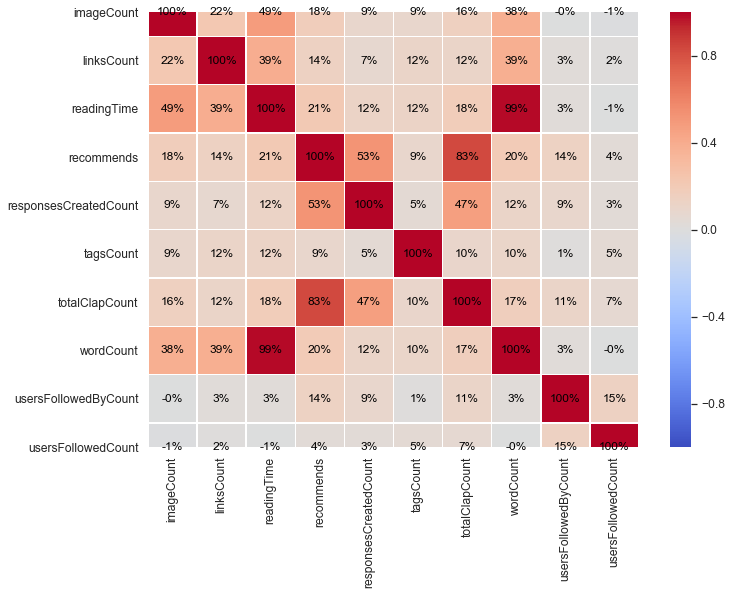

In [18]:
plt.figure(figsize=(11,8))
sns.set(font_scale=1.1)
sns.heatmap(cleanmedium.corr(), linewidth=0.5, cmap='coolwarm',vmin = -1, vmax=1, annot=True, fmt='.0%',\
    annot_kws = {'size': 12, 'color':'black'})
plt.show()

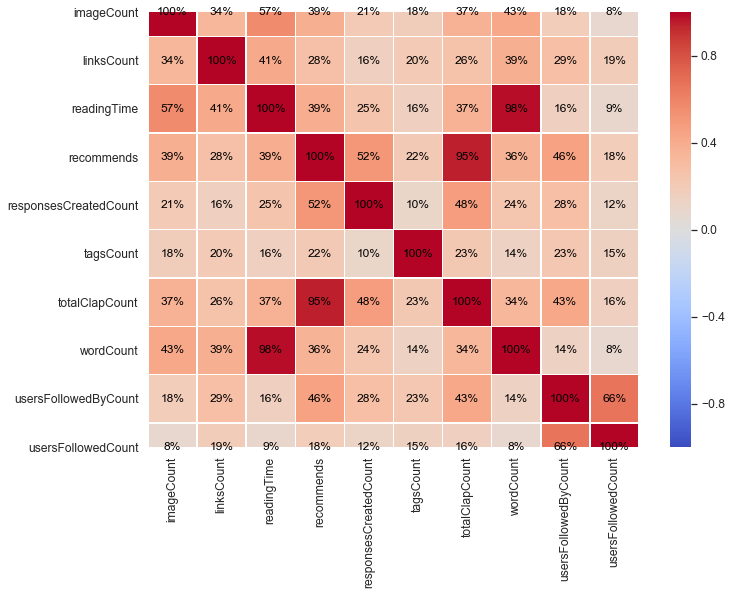

In [19]:
plt.figure(figsize=(11,8))
sns.set(font_scale=1.1)
sns.heatmap(cleanmedium.corr(method='spearman'), linewidth=0.5, cmap='coolwarm',vmin = -1, vmax=1, annot=True, fmt='.0%',\
    annot_kws = {'size': 12, 'color':'black'})
plt.show()

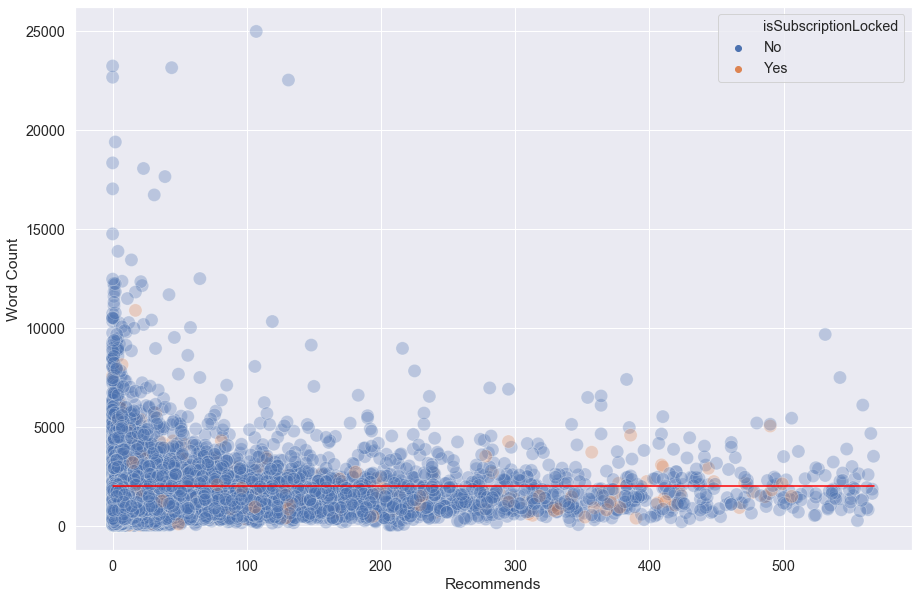

In [21]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.3)
sns.scatterplot(x='recommends', y='wordCount', hue='isSubscriptionLocked', data=cleanmedium, alpha=0.3, s=175)
sns.lineplot(x=cleanmedium['recommends'], y=2000, color='red')
plt.ylabel('Word Count')
plt.xlabel('Recommends')
plt.show()

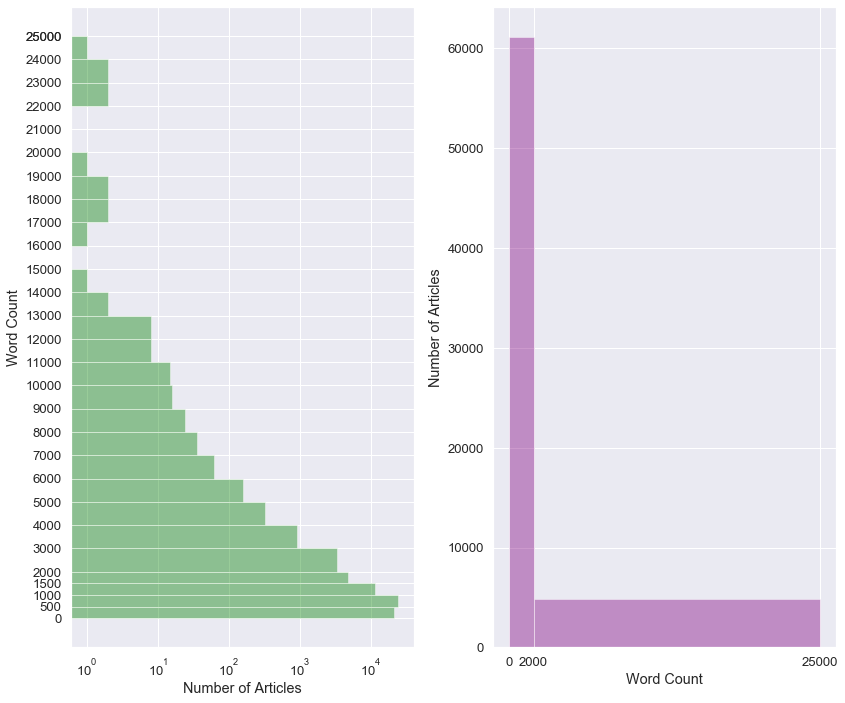

In [22]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)

plt.subplot(1,2,1)
sns.distplot(cleanmedium['wordCount'], kde=False, vertical=True, color='green',bins=[0,500,1000,1500,2000,3000,4000,\
           5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,\
           17000,18000,19000,20000,21000,22000,23000,24000,25000, 25000])
ylabels = [0,500,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,\
           17000,18000,19000,20000,21000,22000,23000,24000,25000, 25000]
plt.yticks(ylabels)
plt.ylabel('Word Count')
plt.xlabel('Number of Articles')
plt.xscale('log')

plt.subplot(1,2,2)
sns.distplot(cleanmedium['wordCount'], kde=False, vertical=False, color='purple',bins=[0,2000, 25000])
xlabels = [0,2000, 25000]
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.xticks(xlabels)

plt.tight_layout()
plt.show()

In [23]:
data1 = cleanmedium.loc[cleanmedium.wordCount <= 2000]
data2 = cleanmedium.loc[cleanmedium.wordCount > 2000]

In [24]:
data1.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000
mean,3.089704,5.657518,3.272125,11.261681,0.451040,4.277851,87.983159,744.589287,1627.095367,296.731297
std,4.318414,7.766006,1.915814,38.055425,2.725898,1.219575,298.202962,453.282674,12320.101104,1571.418537
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.822642,0.000000,0.000000,4.000000,0.000000,398.000000,8.000000,3.000000
50%,2.000000,3.000000,2.969182,2.000000,0.000000,5.000000,5.000000,670.000000,48.000000,22.000000
75%,4.000000,8.000000,4.472956,7.000000,0.000000,5.000000,56.000000,1027.000000,292.000000,124.000000
max,188.000000,229.000000,12.431132,566.000000,342.000000,6.000000,10258.000000,2000.000000,333655.000000,85867.000000


In [25]:
data2.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000,4838.000000
mean,8.912154,17.102522,12.518146,37.865854,1.467549,4.538859,255.966102,3060.993179,2374.598594,279.695329
std,11.120366,24.207553,6.102734,82.582933,3.923720,0.973092,541.618909,1573.672193,17210.703982,1565.996515
min,0.000000,0.000000,7.566038,0.000000,0.000000,1.000000,0.000000,2001.000000,0.000000,0.000000
25%,2.000000,4.000000,9.326730,1.000000,0.000000,5.000000,3.000000,2240.000000,21.000000,5.000000
50%,6.000000,11.000000,10.730660,7.000000,0.000000,5.000000,53.000000,2586.000000,113.000000,31.000000
75%,12.000000,21.000000,13.436557,30.000000,1.000000,5.000000,232.000000,3267.750000,634.000000,148.000000
max,263.000000,613.000000,99.603774,567.000000,63.000000,6.000000,5499.000000,24964.000000,333655.000000,41130.000000


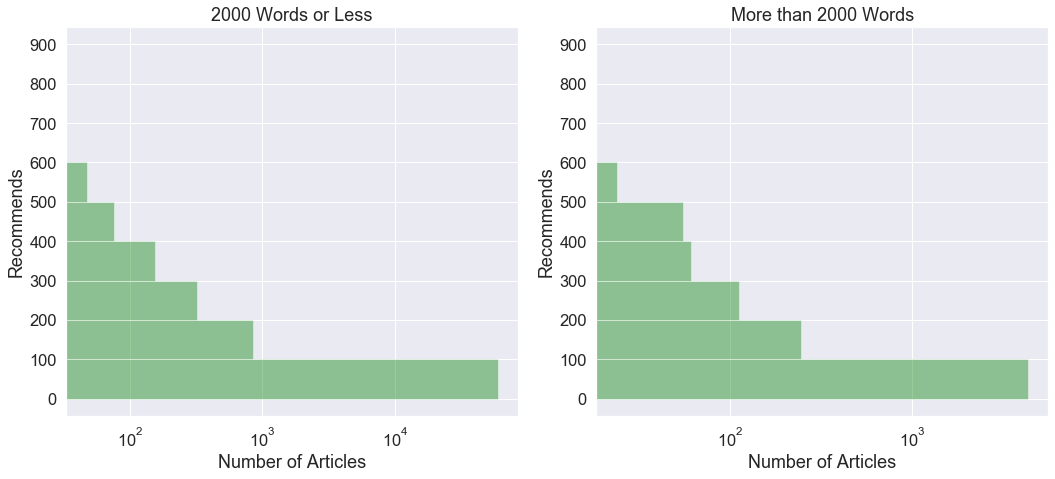

In [26]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)

sns.distplot(data1['recommends'], kde=False, vertical=True, color='green',bins=[0,100,200,300,400,500,600,700, 800, 900])
ylabels = [0,100,200,300,400,500,600,700, 800, 900]
plt.yticks(ylabels)
plt.title('2000 Words or Less')
plt.xscale('log')
plt.ylabel('Recommends')
plt.xlabel('Number of Articles')



plt.subplot(1,2,2)
sns.distplot(data2['recommends'], kde=False, vertical=True, color='green',bins=[0,100,200,300,400,500,600,700, 800, 900])
ylabels = [0,100,200,300,400,500,600,700, 800, 900]
plt.yticks(ylabels)
plt.title('More than 2000 Words')
plt.xscale('log')
plt.ylabel('Recommends')
plt.xlabel('Number of Articles')



plt.tight_layout()
plt.show()

In [27]:
under_2000 = data1.sample(2500)
over_2000 = data2.sample(2500)

In [28]:
y1 = np.mean(under_2000.recommends)
y2 = np.mean(over_2000.recommends)
s1 = np.std(under_2000.recommends)
s2 = np.std(over_2000.recommends)
n1 = 2500
n2 = 2500


print('y1 is {}'.format(y1))
print('y2 is {}'.format(y2))
print('s1 is {}'.format(s1))
print('s2 is {}'.format(s2))
print('n1 is {}'.format(n1))
print('n2 is {}'.format(n2))

y1 is 10.7624
y2 is 38.1608
s1 is 37.33341058944387
s2 is 83.2818188043465
n1 is 2500
n2 is 2500


In [29]:
t_value = (y1-y2) / np.sqrt(((s1**2) / n1) + ((s2**2) / n2))

In [30]:
t_value

-15.010043909345201

In [31]:
from scipy import stats

In [32]:
stats.ttest_ind(under_2000.recommends, over_2000.recommends)

Ttest_indResult(statistic=-15.0070416003024, pvalue=7.926302740274887e-50)

In [33]:
y11 = np.mean(data1.recommends)
y22 = np.mean(data2.recommends)
s11 = np.std(data1.recommends)
s22 = np.std(data2.recommends)

print('y11 is {}'.format(y11))
print('y22 is {}'.format(y22))
print('s11 is {}'.format(s11))
print('s22 is {}'.format(s22))

y11 is 11.261681478208212
y22 is 37.86585365853659
s11 is 38.055113960918575
s22 is 82.5743979611165


In [34]:
R1 = y11/s11

R2 = y22/s22

In [35]:
print('The mean number of recommends per unit of standard deviation for articles with 2000 words or less is {}'.format(R1))
print('The mean number of recommends per unit of standard deviation for articles with over 2000 words is {}'.format(R2))

The mean number of recommends per unit of standard deviation for articles with 2000 words or less is 0.29593083047323443
The mean number of recommends per unit of standard deviation for articles with over 2000 words is 0.45856651206064203


### Results:

The NULL Hypothesis is rejected (p-value < 0.05). The mean number of recommends for the samples from the two groups of articles (over 200 words and 2000 words or less) are statistically different. With the mean number of recommends for the 2000 words or less sample varying over 14 standard deviations from the mean number of recommends of articles over 2000 words. 

### Recommendations:

The data appears to show articles with a word count over 2000 words are more likely to recieve a higher number of recommends. These results have only been shown for this dataset which includes articles tagged with AI, Machine Learning, Datascience or Aritificial Intelligence. Further research and experiments should be conducted before attempting to extrapolate these results to other article types and I would recommend using an even larger dataset. However, this analysis does provide a great starting point for further research and implies my inititial instinct was incorrect as I did not expect articles of greater length to be more highly recommended.

In [36]:
data11 = cleanmedium.loc[cleanmedium.wordCount <= 2000]
data22 = cleanmedium.loc[(cleanmedium.wordCount > 2000) & (cleanmedium.wordCount < 4000)]

In [37]:
data11.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000,61101.000000
mean,3.089704,5.657518,3.272125,11.261681,0.451040,4.277851,87.983159,744.589287,1627.095367,296.731297
std,4.318414,7.766006,1.915814,38.055425,2.725898,1.219575,298.202962,453.282674,12320.101104,1571.418537
min,0.000000,0.000000,0.003774,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.822642,0.000000,0.000000,4.000000,0.000000,398.000000,8.000000,3.000000
50%,2.000000,3.000000,2.969182,2.000000,0.000000,5.000000,5.000000,670.000000,48.000000,22.000000
75%,4.000000,8.000000,4.472956,7.000000,0.000000,5.000000,56.000000,1027.000000,292.000000,124.000000
max,188.000000,229.000000,12.431132,566.000000,342.000000,6.000000,10258.000000,2000.000000,333655.000000,85867.000000


In [38]:
data22.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,tagsCount,totalClapCount,wordCount,usersFollowedByCount,usersFollowedCount
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,8.144226,15.338524,10.772412,37.510062,1.407283,4.540968,250.013656,2609.131529,2396.418304,283.926449
std,8.891971,19.529406,2.046852,80.939468,3.641548,0.961579,511.237097,498.229831,17731.163561,1633.677194
min,0.000000,0.000000,7.566038,0.000000,0.000000,1.000000,0.000000,2001.000000,0.000000,0.000000
25%,2.000000,4.000000,9.160692,2.000000,0.000000,5.000000,4.000000,2202.000000,21.000000,5.000000
50%,6.000000,10.000000,10.283176,7.000000,0.000000,5.000000,54.000000,2466.000000,110.000000,30.000000
75%,11.000000,19.000000,12.001415,31.000000,1.000000,5.000000,236.750000,2914.000000,595.250000,146.000000
max,143.000000,370.000000,18.333019,567.000000,46.000000,6.000000,5499.000000,3990.000000,333655.000000,41130.000000


In [39]:
under_2000_2 = data11.sample(2000)
over_2000_2 = data22.sample(2000)

y111 = np.mean(under_2000_2.recommends)
y222 = np.mean(over_2000_2.recommends)
s111 = np.std(under_2000_2.recommends)
s222 = np.std(over_2000_2.recommends)
n111 = 2000
n222 = 2000


print('y111 is {}'.format(y111))
print('y222 is {}'.format(y222))
print('s111 is {}'.format(s111))
print('s222 is {}'.format(s222))
print('n111 is {}'.format(n111))
print('n222 is {}'.format(n222))

y111 is 12.5675
y222 is 37.377
s111 is 42.626733909015364
s222 is 80.20398288738534
n111 is 2000
n222 is 2000


In [40]:
t_value2 = (y111-y222) / np.sqrt(((s111**2) / n111) + ((s222**2) / n222))

In [41]:
t_value2

-12.21556266598685

In [42]:
stats.ttest_ind(under_2000_2.recommends, over_2000_2.recommends)

Ttest_indResult(statistic=-12.212508393488555, pvalue=1.054794739725637e-33)

In [43]:
y1111 = np.mean(data11.recommends)
y2222 = np.mean(data22.recommends)
s1111 = np.std(data11.recommends)
s2222 = np.std(data22.recommends)

print('y1111 is {}'.format(y1111))
print('y2222 is {}'.format(y2222))
print('s1111 is {}'.format(s1111))
print('s2222 is {}'.format(s2222))

R11 = round(y1111/s1111,2)

R22 = round(y2222/s2222,2)

y1111 is 11.261681478208212
y2222 is 37.51006229036895
s1111 is 38.055113960918575
s2222 is 80.92977173682237


In [44]:
print('The mean number of recommends per unit of standard deviation for articles with 2000 words or less is {}'.format(R11))
print('The mean number of recommends per unit of standard deviation for articles with between 2000 and 4000 words is {}'.format(R22))

The mean number of recommends per unit of standard deviation for articles with 2000 words or less is 0.3
The mean number of recommends per unit of standard deviation for articles with between 2000 and 4000 words is 0.46


In [45]:
data1a = cleanmedium.loc[(cleanmedium.wordCount <= 2000) & (cleanmedium.wordCount > 500)]
data2a = cleanmedium.loc[(cleanmedium.wordCount > 2000) & (cleanmedium.wordCount < 3500)]

print('Sample 1 Size is {}'.format(len(data1a)))
print('Sample 2 Size is {}'.format(len(data2a)))

under_2000a = data1a.sample(2000)
over_2000a = data2a.sample(2000)

y1a = np.mean(under_2000a.recommends)
y2a = np.mean(over_2000a.recommends)
s1a = np.std(under_2000a.recommends)
s2a = np.std(over_2000a.recommends)
n1a = 2000
n2a = 2000


print('y1a is {}'.format(y1a))
print('y2a is {}'.format(y2a))
print('s1a is {}'.format(s1a))
print('s2a is {}'.format(s2a))
print('n1a is {}'.format(n1a))
print('n2a is {}'.format(n2a))

Sample 1 Size is 40113
Sample 2 Size is 3855
y1a is 15.6655
y2a is 37.715
s1a is 47.43638487226867
s2a is 83.34012104022887
n1a is 2000
n2a is 2000


In [46]:
t_value2a = (y1a-y2a) / np.sqrt(((s1a**2) / n1a) + ((s2a**2) / n2a))
t_value2a

-10.282987466988713

In [47]:
stats.ttest_ind(under_2000a.recommends, over_2000a.recommends)

Ttest_indResult(statistic=-10.280416398698247, pvalue=1.7378638528211405e-24)

In [48]:
y1a1 = np.mean(data1a.recommends)
y2a2 = np.mean(data2a.recommends)
s1a1 = np.std(data1a.recommends)
s2a2 = np.std(data2a.recommends)

print('y1a1 is {}'.format(y1a1))
print('y2a2 is {}'.format(y2a2))
print('s1a1 is {}'.format(s1a1))
print('s2a2 is {}'.format(s2a2))

R11a = round(y1a1/s1a1,2)

R22a = round(y2a2/s2a2,2)

y1a1 is 14.883130157305612
y2a2 is 36.98313878080415
s1a1 is 44.444902305733635
s2a2 is 79.88993060903326


In [49]:
print('The mean number of recommends per unit of standard deviation for articles with between 500 and 2000 words is {}'.format(R11a))
print('The mean number of recommends per unit of standard deviation for articles with between 2000 and 3500 words is {}'.format(R22a))

The mean number of recommends per unit of standard deviation for articles with between 500 and 2000 words is 0.33
The mean number of recommends per unit of standard deviation for articles with between 2000 and 3500 words is 0.46


In [151]:
x = [1000,1500,2000,2500,3000,3500,4000,4500]

y = [100,200,300,400,500,600,700,800,900,950]

z = [5000,7500,10000,12500,15000,17500,20000,22500,25000]

data_dict = {}
data_dict_full = {}

for b1 in y:
    for b2 in z:
        for a1 in x:
            data1b = cleanmedium.loc[(cleanmedium.wordCount <= a1) & (cleanmedium.wordCount > b1)]
            data2b = cleanmedium.loc[(cleanmedium.wordCount > a1) & (cleanmedium.wordCount <= b2)]
            
            under_a = data1b.sample(int(round(min(len(list(data1b.recommends.values)), len(list(data2b.recommends.values))/2),0)))
            over_a = data2b.sample(int(round(min(len(list(data1b.recommends.values)), len(list(data2b.recommends.values))/2),0)))

            ya = np.mean(under_a.recommends)
            yb = np.mean(over_a.recommends)
            sa = np.std(under_a.recommends)
            sb = np.std(over_a.recommends)
            na = len(list(under_a.recommends.values))
            nb = len(list(over_a.recommends.values))

            t_val = round((ya-yb) / np.sqrt(((sa**2) / na) + ((sb**2) / nb)),6)

            yc = np.mean(data1b.recommends)
            yd = np.mean(data2b.recommends)
            sc = np.std(data1b.recommends)
            sd = np.std(data2b.recommends)

            R1y = round(yc/sc,4) #

            R2z = round(yd/sd,4) #

            data_dict[t_val] = [b1,a1,b2, R1y, R2z, na]
            data_dict_full[t_val] = [b1,a1,b2, R1y, R2z, na, nb, len(data1b), len(data2b), stats.ttest_ind(under_a.recommends, over_a.recommends)]



In [152]:
t_values_df = pd.DataFrame(data_dict.values(), index=data_dict.keys(),\
                 columns=['Lower Bound', 'Middle Bound', 'Upper Bound', 'REC/STD1', 'REC/STD2', 'Sample Size'])
t_values_df.index.name = 'T-Value'

In [153]:
t_values_df.sort_values('T-Value').tail(5)

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size
T-Value,,,,,,
-1.185107,950,4000,5000,0.3964,0.4585,163
-1.118441,900,4500,5000,0.3912,0.4608,64
-0.983607,900,4000,5000,0.3909,0.4585,163
-0.689680,950,4500,22500,0.3967,0.4233,231
-0.484608,600,4500,5000,0.3572,0.4608,64


In [154]:
t_values_df.sort_values('T-Value').head(5)

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size
T-Value,,,,,,
-27.061999,100,1000,10000,0.2723,0.4008,10468
-26.360311,100,1000,20000,0.2723,0.4008,10488
-26.241260,100,1000,5000,0.2723,0.4016,10322
-26.219091,100,1000,17500,0.2723,0.4008,10486
-26.200607,200,1000,22500,0.2791,0.4008,10488


In [155]:
t_values_df.describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,545.000000,2750.000000,15000.000000,0.342059,0.441117,2354.837500
std,279.881755,1146.440339,6459.459538,0.031978,0.018476,2986.628226
min,100.000000,1000.000000,5000.000000,0.272300,0.400800,64.000000
25%,300.000000,1875.000000,10000.000000,0.315450,0.432800,331.500000
50%,550.000000,2750.000000,15000.000000,0.340550,0.445600,970.500000
75%,800.000000,3625.000000,20000.000000,0.368300,0.456050,2419.000000
max,950.000000,4500.000000,25000.000000,0.396700,0.466700,10491.000000


In [156]:
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [157]:
item1 = go.Scatter(x = t_values_df.index, y = t_values_df['Sample Size'], 
                   mode='markers', marker_size=12, 
                   marker=dict(color='rgba(150, 206, 250, 0.5)', opacity=1, line=dict(width=2,
                                        color='DarkSlateGrey')))
    
layout = go.Layout(title='T-Value by Sample Size', yaxis=dict(title='Sample Size'),
                xaxis=go.layout.XAxis(dtick=3, title='T-Value'), font=dict(size=17), 
                paper_bgcolor='white', plot_bgcolor='lightgrey')

item = go.Figure(data=item1, layout=layout)
iplot(item)

In [158]:
t_values_df[abs(t_values_df.index) <= 3].describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,739.375000,4200.000000,13750.000000,0.372890,0.438787,262.775000
std,229.982629,417.951605,6785.595316,0.025325,0.014097,154.105338
min,100.000000,3000.000000,5000.000000,0.308900,0.423300,64.000000
25%,600.000000,4000.000000,7500.000000,0.357200,0.425300,184.000000
50%,800.000000,4500.000000,12500.000000,0.380500,0.432900,231.000000
75%,950.000000,4500.000000,20000.000000,0.394200,0.446400,325.000000
max,950.000000,4500.000000,25000.000000,0.396700,0.466700,777.000000


In [159]:
t_values_df[t_values_df['Sample Size'] <= 100].describe()

,Lower Bound,Middle Bound,Upper Bound,REC/STD1,REC/STD2,Sample Size
count,10.000000,10.0,10.0,10.000000,10.0000,10.0
mean,545.000000,4500.0,5000.0,0.352040,0.4608,64.0
std,294.816327,0.0,0.0,0.031639,0.0000,0.0
min,100.000000,4500.0,5000.0,0.308900,0.4608,64.0
25%,325.000000,4500.0,5000.0,0.326700,0.4608,64.0
50%,550.000000,4500.0,5000.0,0.350600,0.4608,64.0
75%,775.000000,4500.0,5000.0,0.377525,0.4608,64.0
max,950.000000,4500.0,5000.0,0.396700,0.4608,64.0


In [160]:
t_values_df.drop(t_values_df[t_values_df['Sample Size'] <= 100].index, inplace=True)
t_values_df.drop(t_values_df[abs(t_values_df.index) <= 3].index, inplace=True)

In [161]:
t_values_df.index.max()

-3.017747

In [162]:
t_values_df.index.min()

-27.061999

In [163]:
t_values_df['Sample Size'].max()

10491

In [164]:
t_values_df['Sample Size'].min()

163

In [165]:
new_df = pd.DataFrame()
new_df['Lower Bound'] = t_values_df['Lower Bound'].tolist()
new_df['Upper Bound'] = t_values_df['Middle Bound'].tolist()
new_df['Recommends/STD'] = t_values_df['REC/STD1'].tolist()
new_df.reset_index(drop=True)

new_df2 = pd.DataFrame()
new_df2['Lower Bound'] = t_values_df['Middle Bound'].tolist()
new_df2['Upper Bound'] = t_values_df['Upper Bound'].tolist()
new_df2['Recommends/STD'] = t_values_df['REC/STD2'].tolist()
new_df2.reset_index(drop=True)

bound_df = new_df.append(new_df2, ignore_index=True)

In [166]:
bound_df.head()

,Lower Bound,Upper Bound,Recommends/STD
0,100,1000,0.2723
1,100,1500,0.2909
2,100,2000,0.3009
3,100,2500,0.3046
4,100,3000,0.3070


In [167]:
bound_df.tail()

,Lower Bound,Upper Bound,Recommends/STD
1275,2000,25000,0.4586
1276,2500,25000,0.4562
1277,3000,25000,0.4463
1278,3500,25000,0.4479
1279,4000,25000,0.4349


In [168]:
item2 = go.Scatter(x = bound_df['Lower Bound'], y = bound_df['Upper Bound'],
                   mode='markers', marker_size=12, text=bound_df['Recommends/STD'],
                   marker=dict(color = bound_df['Recommends/STD'], colorscale='Viridis', opacity=0.3, showscale=True, 
                   line=dict(width=2, color='DarkSlateGrey')))
    
layout = go.Layout(title='Recommends per unit of Standard Deviation by Sample Range', yaxis=dict(title='Upper Bound'),
                xaxis=go.layout.XAxis(title='Lower Bound'), font=dict(size=17), 
                paper_bgcolor='white', plot_bgcolor='lightgrey')

item3 = go.Figure(data=item2, layout=layout)
iplot(item3)